In [85]:
import pandas as pd
import numpy as np
df = pd.read_csv("./autoscout.csv", encoding = "iso8859-1")

In [86]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [88]:
df.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [89]:
for col in df.columns:
    print(col)

mileage
make
model
fuel
gear
offerType
price
hp
year


In [90]:
df["hp"].unique()

array([116., 122., 160., 110., 156.,  99., 131., 150.,  86., 101., 105.,
       204., 141., 120.,  60., 135., 143., 140., 163., 179., 125.,  90.,
       109.,  98., 184., 102., 126.,  80., 136., 190., 170.,  94., 178.,
        69.,  87., 200., 252., 333.,  71.,  67.,  95.,  75., 272., 218.,
       231., 239., 300., 224., 320., 354., 286., 370., 235., 265., 211.,
       367., 400., 381., 245., 347., 340.,  72.,  84., 117., 132., 124.,
        82.,  92., 128.,  58.,  73., 106., 182., 326.,  38., 194., 313.,
       392., 199., 551.,  54.,  88.,  61.,  68.,  97.,  77.,  nan, 258.,
       155., 349., 310., 254., 220., 209., 250., 177., 238., 114., 280.,
       230., 185., 181., 212., 111., 334., 460., 635., 192., 435., 450.,
       421., 455., 165., 237., 360., 408., 341., 253., 390., 145., 166.,
        83.,  91., 175., 147., 152.,  76.,  65., 167., 173., 118., 462.,
       306., 449., 188., 717., 510., 600.,   5., 121., 197., 330., 262.,
       700., 476., 401., 575., 159., 151.,  11., 22

In [91]:
df = df.drop(df[df["hp"] <= 50].index)

In [92]:
df["hp"].min()

52.0

In [93]:
df_new = df.drop(["make","offerType","model"],axis=1)

In [94]:
df_new

,mileage,fuel,gear,price,hp,year
0,235000,Diesel,Manual,6800,116.0,2011
1,92800,Gasoline,Manual,6877,122.0,2011
2,149300,Gasoline,Manual,6900,160.0,2011
3,96200,Gasoline,Manual,6950,110.0,2011
4,156000,Gasoline,Manual,6950,156.0,2011
...,...,...,...,...,...,...
46400,99,Electric/Gasoline,Manual,12990,71.0,2021
46401,99,Electric/Gasoline,Manual,12990,71.0,2021
46402,99,Electric/Gasoline,Manual,12990,71.0,2021
46403,99,Electric/Gasoline,Manual,12990,71.0,2021


In [95]:
df_new = df_new.dropna()

In [96]:
df_new.describe()

,mileage,price,hp,year
count,4.613100e+04,4.613100e+04,46131.000000,46131.000000
mean,7.123053e+04,1.660665e+04,133.292190,2016.015846
std,6.245630e+04,1.934344e+04,75.400121,3.156141
min,0.000000e+00,1.100000e+03,52.000000,2011.000000
25%,1.989000e+04,7.495000e+03,86.000000,2013.000000
50%,6.000000e+04,1.100000e+04,116.000000,2016.000000
75%,1.050000e+05,1.949500e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [97]:
import seaborn as sns

KeyError: 'gear'

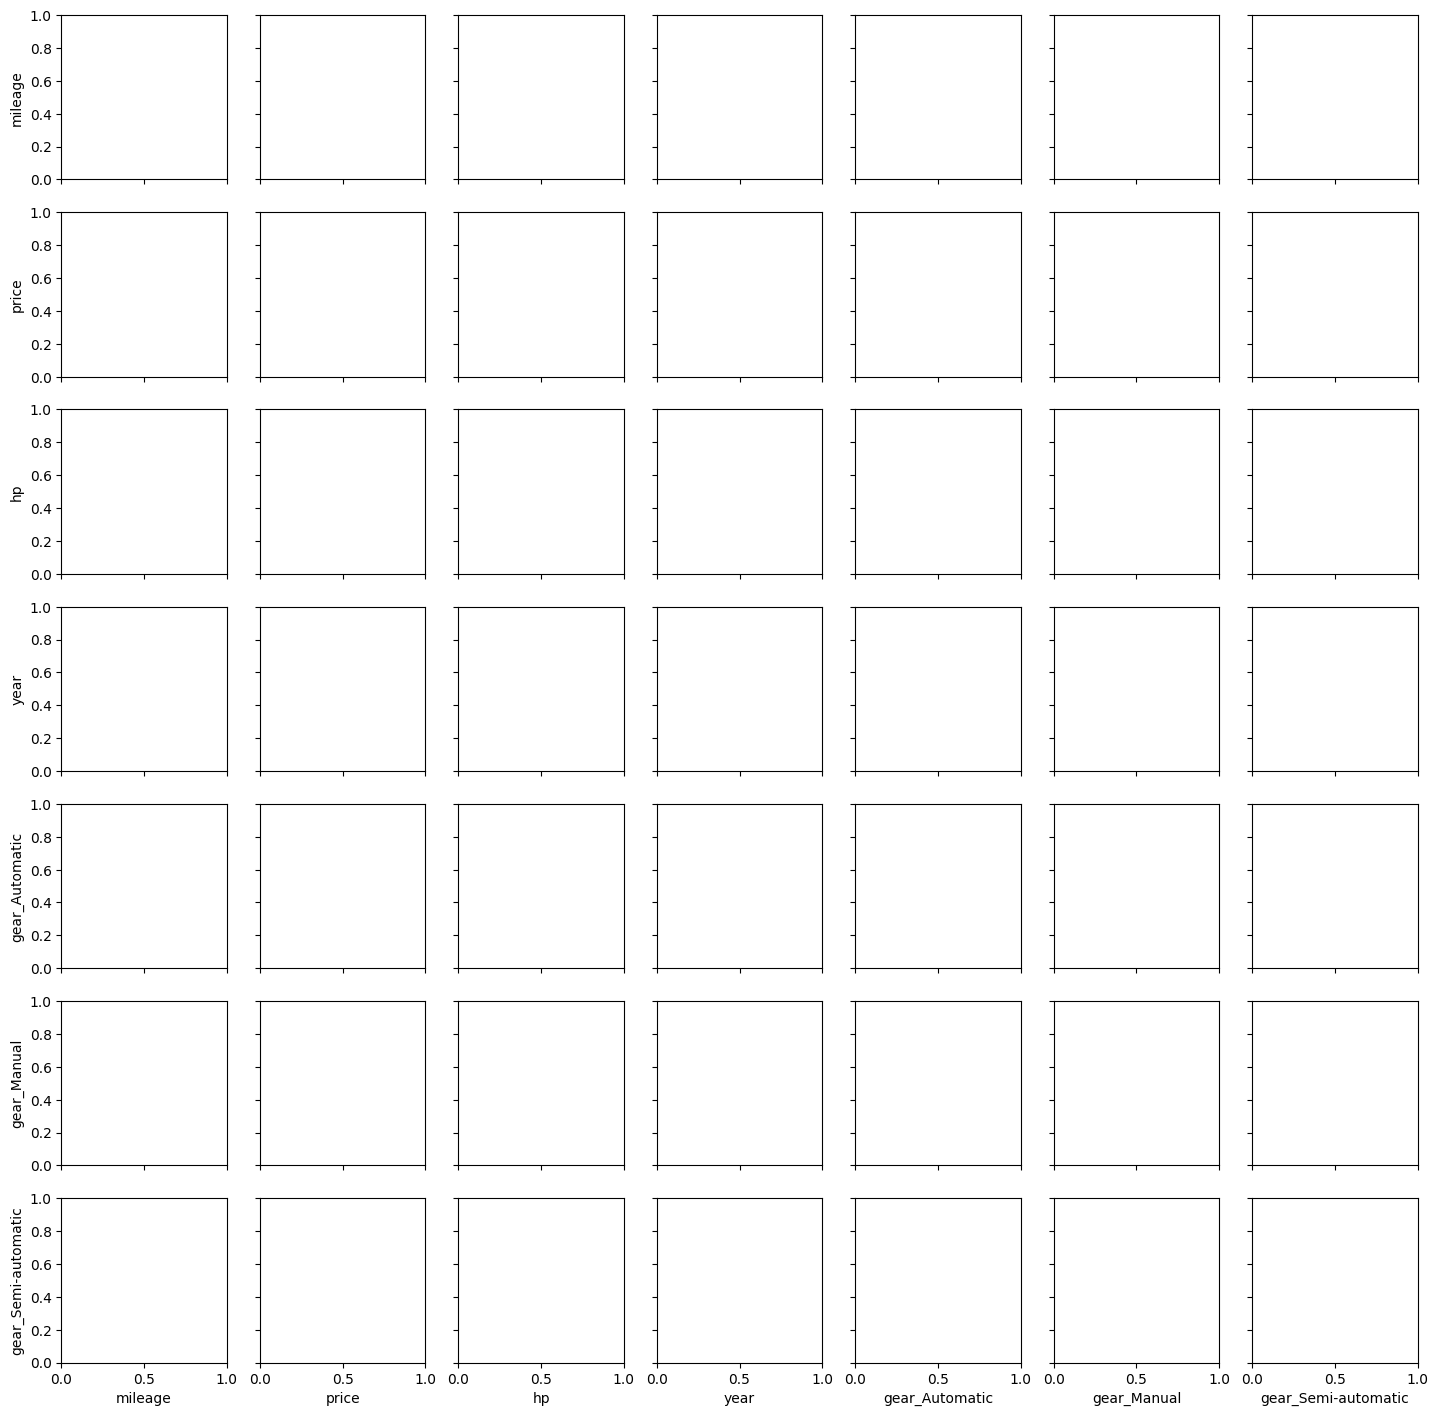

In [102]:
g = sns.pairplot(df_new.sample(100), hue = "gear")

In [99]:
df_new["gear"].unique()

array(['Manual', 'Automatic', 'Semi-automatic'], dtype=object)

In [100]:
df_new = pd.get_dummies(df_new, columns = ["gear"])

In [103]:
df_new = pd.get_dummies(df_new, columns = ["fuel"])

In [104]:
df_new

,mileage,price,hp,year,gear_Automatic,gear_Manual,gear_Semi-automatic,fuel_-/- (Fuel),fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Electric/Diesel,fuel_Electric/Gasoline,fuel_Ethanol,fuel_Gasoline,fuel_Hydrogen,fuel_LPG,fuel_Others
0,235000,6800,116.0,2011,False,True,False,False,False,True,False,False,False,False,False,False,False,False
1,92800,6877,122.0,2011,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,149300,6900,160.0,2011,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,96200,6950,110.0,2011,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4,156000,6950,156.0,2011,False,True,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46400,99,12990,71.0,2021,False,True,False,False,False,False,False,False,True,False,False,False,False,False
46401,99,12990,71.0,2021,False,True,False,False,False,False,False,False,True,False,False,False,False,False
46402,99,12990,71.0,2021,False,True,False,False,False,False,False,False,True,False,False,False,False,False
46403,99,12990,71.0,2021,False,True,False,False,False,False,False,False,True,False,False,False,False,False


In [105]:
y = df_new["price"]
X = df_new.drop(["price"],axis=1)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.5763586362041
0.6924083128710758


In [121]:
meinVWBus = X.loc[[1]]

In [122]:
meinVWBus

,mileage,hp,year,gear_Automatic,gear_Manual,gear_Semi-automatic,fuel_-/- (Fuel),fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Electric/Diesel,fuel_Electric/Gasoline,fuel_Ethanol,fuel_Gasoline,fuel_Hydrogen,fuel_LPG,fuel_Others
1,92800,122.0,2011,False,True,False,False,False,False,False,False,False,False,True,False,False,False


In [123]:
print(model.predict(meinVWBus))

[8037.1444102]
